<a href="https://colab.research.google.com/github/phuong-hoa-vu/Bank-Of-America-Consumer-Complaint-EDA/blob/main/Bank_of_America_Consumer_Complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Consumer Complaints for Bank of America (2021–2024)

**INTRODUCTION**

<br>
Bank of America is one of the world's top rated financial institutions, offering a wide range of investment options and financial services. In this project, we will focus specifically on its financial services and analyze consumer complaints related to them. The goal of this analysis is to understand how consumer complaints have evolved between 2021 and 2024 and to identify which financial services may require more attention and improvement to enhance customer satisfaction and reduce recurring issues.<br>
The analysis will address the following key aspects:

*   **Trend in Complaints:** An assessment of the overall trend in the volume of complaints received from 2021 to 2024.
*   **Product/Service-Specific Complaints:** An examination of which financial products and services are generating the highest volume of complaints.
*   **Geographic Distribution:** An identification of which states report the highest number of complaints.
<br> The dataset that will be used for this project will be available at [Consumer Complaint Bank Of America Dataset](https://www.consumerfinance.gov/data-research/consumer-complaints/search/?chartType=line&company=BANK%20OF%20AMERICA%2C%20NATIONAL%20ASSOCIATION&dateInterval=Month&date_received_max=2024-12-31&date_received_min=2021-01-01&lens=Product&searchField=all&subLens=sub_product&tab=Trends)







# I. DATA EXPLORATION
First, we’ll import the necessary libraries for data processing and visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next, we will import the Bank Of America dataset and perform a preliminary overview to examine its structure and data types.

In [ ]:
complaints = pd.read_csv('/content/drive/MyDrive/EDA Project/complaints.csv')
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53133 entries, 0 to 53132
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 53133 non-null  object 
 1   Product                       53133 non-null  object 
 2   Sub-product                   53128 non-null  object 
 3   Issue                         53132 non-null  object 
 4   Sub-issue                     46516 non-null  object 
 5   Consumer complaint narrative  26064 non-null  object 
 6   Company public response       52483 non-null  object 
 7   Company                       53133 non-null  object 
 8   State                         52514 non-null  object 
 9   ZIP code                      52930 non-null  object 
 10  Tags                          8072 non-null   object 
 11  Consumer consent provided?    43211 non-null  object 
 12  Submitted via                 53133 non-null  object 
 13  D

>Upon reviewing the initial dataset, it was observed that the *'Consumer disputed?'* column contains only null values, making it unsuitable for analysis and inconsistent with the project’s objectives. Additionally, the *'Tags'*, *'Submitted via'*, and *'Consumer consent provided?'* columns were deemed irrelevant to the scope of this analysis, as they do not contribute to addressing the defined business questions. Furthermore, the *'Consumer complaint narrative'* column, which contains a large proportion of missing values, does not provide sufficient data for meaningful analysis in this context. Therefore, these columns will be removed to streamline the dataset and ensure a more focused and relevant analysis.

In [ ]:
complaints.drop(columns=['Consumer disputed?', 'Tags', 'Submitted via', 'Consumer consent provided?', 'Consumer complaint narrative'], inplace=True)

> After we have dropped the columns, we will look display remaining columns to confirm the updated structure of the dataset.

In [ ]:
print(complaints.columns)
len(complaints.columns)

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Company public response', 'Company', 'State', 'ZIP code',
       'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')


13

> In the updated dataset, there are 13 columns.

> It was also observed that the data type of some columns is incorrect. Specifically, the *'Date received'* and *'Date sent to company'* columns are currently in string format, despite the headings suggesting that they should be in a Datetime format.

In [ ]:
complaints['Date received'] = pd.to_datetime(complaints['Date received'], dayfirst=True, errors='coerce')

complaints['Date sent to company'] = pd.to_datetime(complaints['Date sent to company'], dayfirst=True, errors='coerce')

> We will now review a sample of the dataset to verify that the data types have been correctly formatted

In [ ]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53133 entries, 0 to 53132
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date received                 53133 non-null  datetime64[ns]
 1   Product                       53133 non-null  object        
 2   Sub-product                   53128 non-null  object        
 3   Issue                         53132 non-null  object        
 4   Sub-issue                     46516 non-null  object        
 5   Company public response       52483 non-null  object        
 6   Company                       53133 non-null  object        
 7   State                         52514 non-null  object        
 8   ZIP code                      52930 non-null  object        
 9   Date sent to company          53133 non-null  datetime64[ns]
 10  Company response to consumer  53133 non-null  object        
 11  Timely response?            

We will now inspect the dataset to identify any null values.

In [ ]:
complaints.isnull().sum()

,0
Date received,0
Product,0
Sub-product,5
Issue,1
Sub-issue,6617
Company public response,650
Company,0
State,619
ZIP code,203
Date sent to company,0


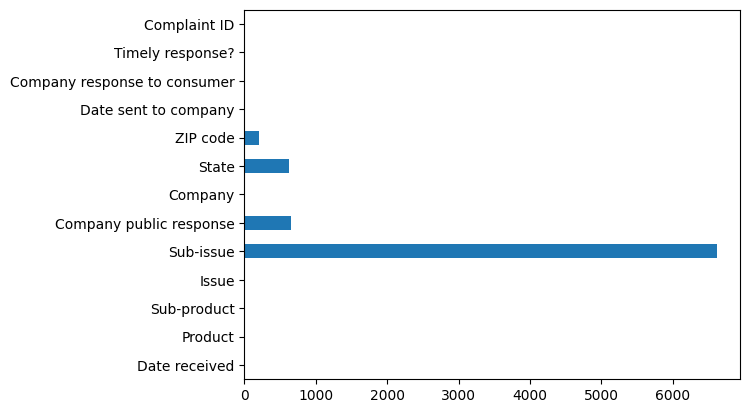

In [ ]:
complaints.isnull().sum().plot.barh()
plt.show()

> As illustrated in the chart, the 'Sub-issue' column has the highest proportion of missing values. Both 'Company public response' and 'State' have a similar percentage of missing data, while 'ZIP code' also contains some missing values but the amount is relatively minimal compared to the overall dataset.

In [ ]:
round(complaints.isnull().sum()/53133, 3)

,0
Date received,0.000
Product,0.000
Sub-product,0.000
Issue,0.000
Sub-issue,0.125
Company public response,0.012
Company,0.000
State,0.012
ZIP code,0.004
Date sent to company,0.000


> Approximately 12.5% of the values in the *'Sub-issue'* column are missing, while the missing values of *'Company public response'*, *'State'* and *ZIP code* column has less than 2% of missing values.

Since ZIP code was initially considered for geographic analysis, we further investigated its completeness and quality before proceeding.


In [ ]:
complaints['ZIP code'].value_counts(dropna=False).head(20)


,count
ZIP code,
XXXXX,2016
NaN,203
076XX,71
90044,68
91205,66
902XX,64
11235,63
33178,63
070XX,60


In [ ]:
contains_x_or_missing = (
    complaints['ZIP code'].astype(str).str.contains('X', na=False) |
    complaints['ZIP code'].isnull()
)

contains_x_or_missing.sum() / len(complaints) * 100

np.float64(13.906611710236577)

> By reviewing the top 20 most common ZIP codes, it is evident that several entries are partially or fully masked with the character 'X', such as 'XXXXX' or '604XX'. The most frequent ZIP code in the dataset is a masked value, indicating that a notable portion of this column lacks precise geographic detail. In total, approximately 12.9% of ZIP code entries are either masked or missing. Due to this limitation, the ZIP code column will not be used for primary geographic analysis. Instead, the analysis will be conducted at the State level to ensure accuracy and consistency. The ZIP code field will be retained in the dataset for potential use in supplementary drill-downs or future geographic insights where applicable.

To ensure the integrity of the dataset and that each complaint is uniquely identifiable, we will examine the *'Complaint ID'* column for any duplicate entries. This step is crucial for maintaining the accuracy and consistency of the data.

In [ ]:
complaints['Complaint ID'].duplicated().sum()

np.int64(0)

> The results indicate that there are no duplicate Complaint IDs present in the dataset.

We will now conduct a closer examination of the types of products that are most frequently associated with consumer complaints

In [ ]:
complaints['Product'].nunique()

14

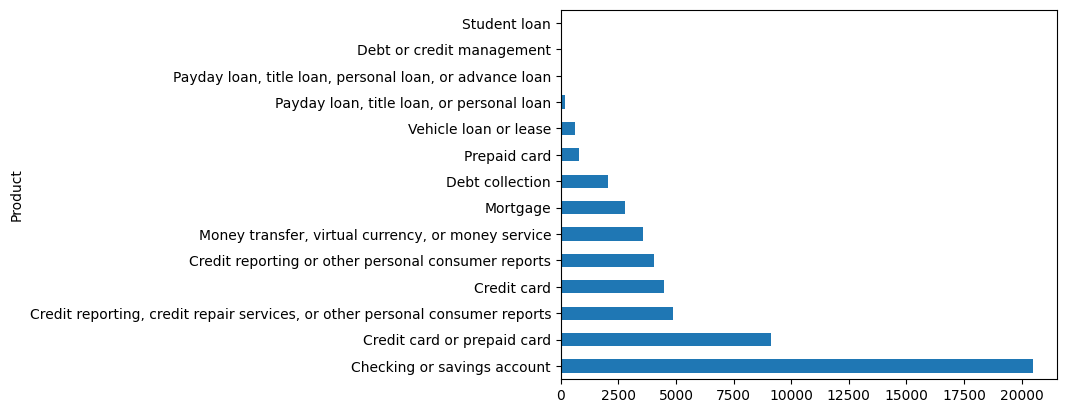

In [ ]:
complaints['Product'].value_counts().plot.barh()
plt.show()

> There are a total of 14 financial products in the dataset, with 'Checking or savings account' receiving the highest number of consumer complaints

Next let's examine the states that have complaints.

In [ ]:
complaints['State'].unique()

array(['CA', 'TX', 'KY', 'OK', 'NJ', 'GA', 'AL', 'IL', 'AZ', 'ME', 'NY',
       'CT', 'OR', 'DC', 'SC', 'FL', 'MI', 'MD', 'PA', 'OH', 'NV', 'UT',
       'DE', 'MA', 'IN', 'NC', 'PR', 'KS', 'VA', 'LA', 'CO', 'TN', nan,
       'NM', 'MS', 'RI', 'WA', 'AK', 'MO', 'IA', 'MN', 'WI', 'GU', 'WV',
       'AR', 'HI', 'NE', 'ID', 'NH', 'ND', 'AE', 'AP', 'SD',
       'UNITED STATES MINOR OUTLYING ISLANDS', 'VT', 'VI', 'MT', 'WY',
       'AA'], dtype=object)

In [ ]:
complaints['State'].nunique()

58

>The analysis reveals that there are 58 unique entries in the *'State'* column. However, this number exceeds the 50 U.S. states, indicating the presence of invalid or inconsistent entries. These discrepancies include U.S. territories and other non-state values, which require further investigation and cleaning to ensure data accuracy.

# II.DATA PREPARATION
In this section, we will prepare the dataset to ensure it is clean, consistent, and structured in a way that enables the identification of clear and meaningful patterns.

## Data Cleaning
The *'State'* column contains entries beyond the standard 50 U.S. states. To ensure consistency and accuracy in the dataset, these non-standard or extraneous entries will be identified and removed as part of the data cleaning process.

In [ ]:
us_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]
non_us_states = complaints[~complaints['State'].isin(us_states)]
non_us_states['State'].unique()

array(['DC', 'PR', nan, 'GU', 'AE', 'AP',
       'UNITED STATES MINOR OUTLYING ISLANDS', 'VI', 'AA'], dtype=object)

In [ ]:
non_us_states['State'].value_counts()

,count
State,
DC,275
PR,50
AP,14
AE,13
UNITED STATES MINOR OUTLYING ISLANDS,4
GU,2
VI,2
AA,2


In [ ]:
#Percentage of non-U.S. states in the dataset not including 'DC'
round((non_us_states['State'].value_counts().sum()-275)/53133, 3)

np.float64(0.002)

>We have successfully filtered out the non-U.S. states from the dataset. However, there are entries such as *'DC'* (Washington D.C.), which is a federal district and not a state. Since Washington D.C. is geographically located within the state of Virginia, we can merge 'DC' with Virginia (VA) for consistency. Additionally, values like 'PR' (Puerto Rico), 'UNITED STATES MINOR OUTLYING ISLANDS', 'AE', 'AP', 'VI', 'AA', and 'GU' correspond to U.S. territories or military postal addresses and are not part of the 50 U.S. states. These entries represent only 0.2% of the entire dataset, making it justifiable to remove them. Furthermore, the presence of null values indicates missing data, and these entries will also be removed. To ensure a cleaner analysis, only valid U.S. state abbreviations will be retained in the dataset for further analysis.


In [ ]:
#Merging 'DC' entries to 'VA'
complaints['State'] = complaints['State'].replace('DC', 'VA')


In [ ]:
#Removing null values
complaints.dropna(subset=['State'], inplace=True)
complaints['State'].isnull().sum()

np.int64(0)

> All the null values have been removed.

In [ ]:
#Removing the non-U.S. States
complaints.drop(complaints[complaints['State'].isin(['PR', 'UNITED STATES MINOR OUTLYING ISLANDS', 'AE', 'AP', 'VI', 'AA', 'GU'])].index, inplace=True)
complaints['State'].nunique()


50

> There are now only 50 U.S States in the dataset.

Following the removal of invalid or non-U.S. state entries, the index of the dataset was no longer in order. To tidy up the dataset and make it easier to work with, the index was reset so that it runs sequentially from 0.


In [ ]:
complaints.reset_index(drop=True, inplace=True)
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52427 entries, 0 to 52426
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date received                 52427 non-null  datetime64[ns]
 1   Product                       52427 non-null  object        
 2   Sub-product                   52422 non-null  object        
 3   Issue                         52426 non-null  object        
 4   Sub-issue                     45993 non-null  object        
 5   Company public response       51786 non-null  object        
 6   Company                       52427 non-null  object        
 7   State                         52427 non-null  object        
 8   ZIP code                      52424 non-null  object        
 9   Date sent to company          52427 non-null  datetime64[ns]
 10  Company response to consumer  52427 non-null  object        
 11  Timely response?            

>There are now 52,427 entries in the dataset.

## Feature Engineering
To effectively analyze the seasonal trends in complaints, it would be beneficial to create two new column named 'Month' and 'Year'. This will allow for a clearer and more straightforward analysis by extracting the month and year from each complaint, making it easier to identify patterns over time.

In [ ]:
complaints['Month'] = complaints['Date received'].dt.month
complaints['Month'].unique()

array([ 5, 11,  8,  7,  6,  3,  4,  2, 12,  1, 10,  9], dtype=int32)

>The month for each entry has been extracted and stored for future analysis.

In [ ]:
complaints['Year'] = complaints['Date received'].dt.year
complaints['Year'].unique()

array([2024, 2023, 2021, 2022], dtype=int32)

>The year for each entry has been extracted and stored for future analysis.

## Fixing missing values
Next, we will examine the columns containing missing values and determine the most appropriate and logical methods for handling them.

In [ ]:
complaints.isnull().sum()

,0
Date received,0
Product,0
Sub-product,5
Issue,1
Sub-issue,6434
Company public response,641
Company,0
State,0
ZIP code,3
Date sent to company,0


> This table provides a clear overview of all columns containing missing values, enabling us to identify areas requiring data cleaning.

### 'Sub-issue' column


In [ ]:
complaints['Sub-issue'].isnull().sum()/len(complaints)

np.float64(0.12272302439582658)

>The '*Sub-issue'* column has missing values in approximately 12% of the records. Rather than removing these entries, which could lead to unnecessary data loss, a placeholder text of 'Not specified' was used to fill in the missing values. This approach maintains the integrity of the dataset and allows for consistent formatting during analysis.

In [ ]:
# Fill missing values in 'Sub-issue' with a placeholder
complaints['Sub-issue'].fillna('Not specified')
#Check the result
complaints['Sub-issue'].isnull().sum()

np.int64(6434)

### 'Company public response' column
Let's first have a look at the missing values in the column:


In [ ]:
complaints['Company public response'].isnull().sum()

np.int64(641)

In [ ]:
complaints['Company public response'].unique()

array(['Company has responded to the consumer and the CFPB and chooses not to provide a public response',
       nan,
       'Company believes the complaint is the result of a misunderstanding',
       "Company believes the complaint provided an opportunity to answer consumer's questions",
       'Company believes it acted appropriately as authorized by contract or law',
       'Company believes complaint caused principally by actions of third party outside the control or direction of the company'],
      dtype=object)

>There are 641 missing values. Upon reviewing the column and considering the defined business questions, it was concluded that this feature does not offer substantial value to our analysis. Most of its entries are generic, and the detailed nature of company actions is already better represented in the Company response to consumer column.

Therefore, to keep the dataset focused and efficient, this column will be removed.

In [ ]:
complaints.drop(columns=['Company public response'], inplace=True)

In [ ]:
complaints.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Company', 'State', 'ZIP code', 'Date sent to company',
       'Company response to consumer', 'Timely response?', 'Complaint ID',
       'Month', 'Year'],
      dtype='object')

>The column has been successfully dropped.

### 'Sub-product' column
Let's examine the number of missing values in the 'Sub-product' column and determine the most appropriate approach to address them.

In [ ]:
complaints['Sub-product'].isnull().sum()

np.int64(5)

>There are five missing values in the *'Sub-product'* column. The most suitable approach is to examine the corresponding *'Product'* and identify the mode (most frequent value) of the *'Sub-product'* associated with that product. This preserves the structure of the data and avoids generic or misleading replacements.


In [ ]:
# Fill missing 'Sub-product' values with the most common sub-product for that product
complaints['Sub-product'] = complaints.groupby('Product')['Sub-product'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Not specified')
)

# Check the result
complaints['Sub-product'].isnull().sum()


np.int64(0)

### 'Issue' column

In [ ]:
#Check how many values are missing
complaints['Issue'].isnull().sum()

np.int64(1)

>The 'Issue' column contains only one missing value. Because this field is essential for understanding the nature of each complaint, it's important to maintain its accuracy. Instead of filling the missing value with a placeholder, the row is removed to ensure data quality without significantly affecting the dataset size.


In [ ]:
#Drop the row
complaints = complaints.dropna(subset=['Issue'])

#Check the result
complaints['Issue'].isnull().sum()

np.int64(0)

# III.ANALYSIS
This section aims to analyze the evolution of consumer complaints from 2021 to 2024, with the objective of identifying financial services that may require enhanced attention and improvements to increase customer satisfaction and address recurring issues.





## Trend in Complaints
This section will show the monthly breakdown of the average complaint volumes from January to December from 2021 to 2024.

In [ ]:
monthly_complaints = complaints.groupby(['Year','Month'])['Complaint ID'].count().groupby('Month').mean().round(0).astype(int)
print(monthly_complaints)

Month
1     1078
2     1020
3     1155
4     1073
5     1042
6     1008
7     1215
8     1137
9     1099
10    1082
11    1065
12    1132
Name: Complaint ID, dtype: int64


> This shows the total number of complaints for each month.

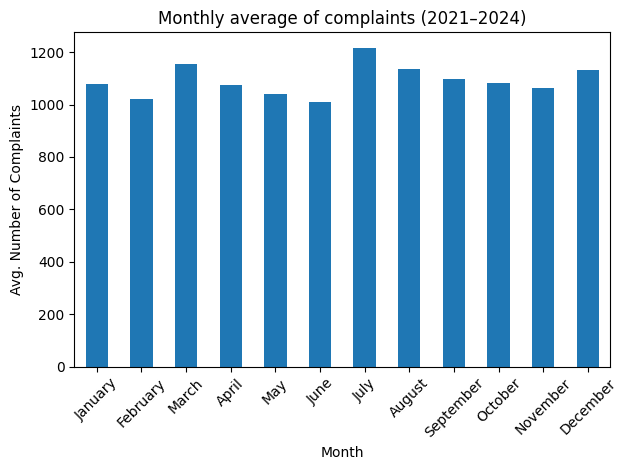

In [ ]:
import calendar

# Sort the data by month number (this step remains unchanged)
monthly_complaints = monthly_complaints.sort_index()

# Map the numeric months to month names using calendar.month_name
monthly_complaints.index = monthly_complaints.index.map(lambda x: calendar.month_name[x])

# Visualize the monthly complaint trend with month names
monthly_complaints.plot(kind='bar', title='Monthly average of complaints (2021–2024)', xlabel='Month', ylabel='Avg. Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()

> From the graph, we can observe consistent seasonal patterns in the average volume of complaints. There are two noticeable peaks. The first is in July, with an average of 1,215 complaints, making it the highest month overall. This increase may be tied to mid-year financial reviews, summer travel spending, or school holidays, which can lead to more disputes and service issues.

>The second peak appears in March, averaging 1,155 complaints. This may be linked to tax season in the US, when consumers are more likely to review accounts, question charges, or seek support for tax-related services.

>In contrast, June records the lowest monthly average with 1,008 complaints, suggesting a quieter financial period. Many consumers may delay action until the second half of the year, which aligns with the July spike.

<br>**Conclusion**

<br>Overall, the monthly averages are relatively stable, ranging between 1,000 and 1,215 complaints. These results suggest that while volumes remain steady throughout the year, certain months particularly March and July consistently see higher activity, reflecting seasonal financial behaviors and consumer cycles. This suggests that additional resources and customer support should be allocated in March and July to manage the seasonal increase in complaint volumes.

## Product Analysis


By looking at how the number of complaints changes across products from 2021 to 2024, we can see where issues have increased and where improvements have been made. This section focuses on the products that need the most attention and highlights areas where steps can be taken to reduce or better manage complaints.

### Product trends from 2021 - 2024

First, we will look at the overall top 5 product trends from 2021 to 2024. This gives a clear view of which products received the most complaints and how those numbers have shifted over time.

In [ ]:
# Group by Product and get the top 5 products with the most complaints
top5_overall = complaints.groupby('Product')['Complaint ID'].count().nlargest(5).index
top5_overall


Index(['Checking or savings account', 'Credit card or prepaid card',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit card', 'Credit reporting or other personal consumer reports'],
      dtype='object', name='Product')

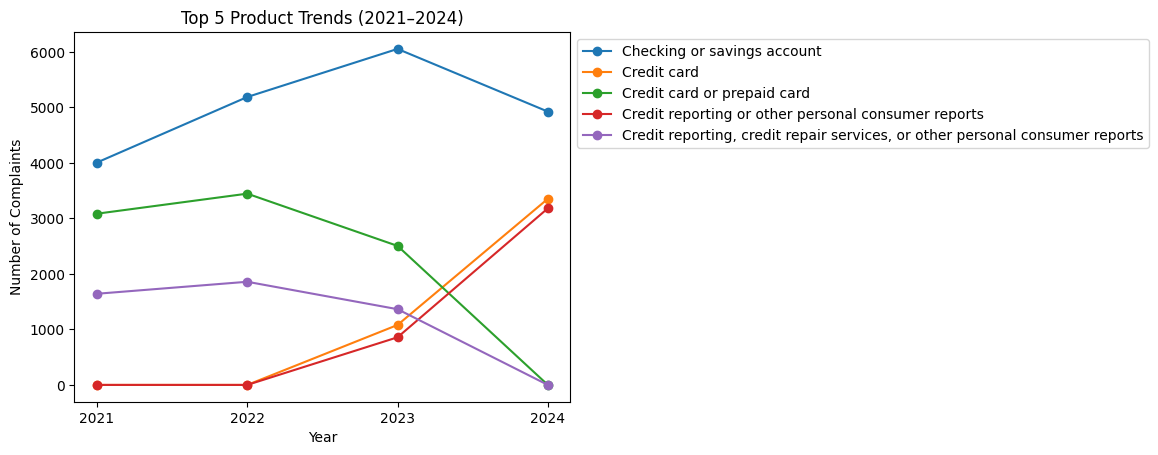

In [ ]:
import matplotlib.ticker as mticker
# Group by Year and Product
product_complaints_overview = complaints.groupby(['Year', 'Product'])['Complaint ID'].count().reset_index()
# Filter to only contain the top 5 products
product_complaints_top5 = product_complaints_overview[product_complaints_overview['Product'].isin(top5_overall)]

#Pivot so each product is its own column
new_top5 = product_complaints_top5.pivot(index='Year', columns='Product', values='Complaint ID').fillna(0)

#Plot line graph
ax = new_top5.plot.line(marker = 'o')
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.title("Top 5 Product Trends (2021–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

> From this line chart, we can see that ‘Checking or savings account’ remained the product with the highest number of complaints, peaking in 2023 before declining in 2024. In contrast, both ‘Credit card’ and ‘Credit reporting or other personal consumer reports’ showed a sharp upward trend in 2023 and 2024, which calls for a deeper look into the reasons behind this rise. Meanwhile, ‘Credit card or prepaid card’ and ‘Credit reporting, credit repair services, or other personal consumer reports’ ranked 2nd and 3rd in 2021–2022 but declined through 2023 and 2024, suggesting improvements in managing complaints for those products.

### Top Products with the Highest Complaint Volume in 2024

Now we will look at the latest complaint trends in 2024. This provides a clear view of the current situation and highlights which products are most relevant today.

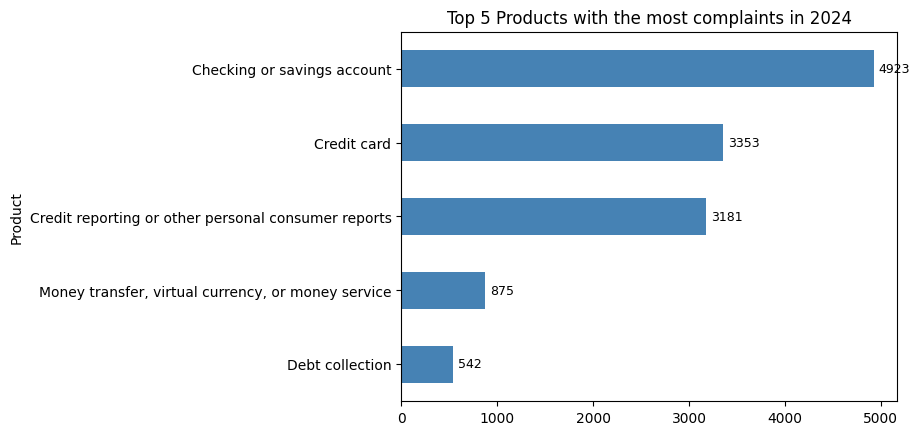

In [ ]:
product_complaints = complaints.groupby(['Year', 'Product'])['Complaint ID'].count()

# Slice only 2024, then sort
product_complaints_2024 = product_complaints.loc[2024].sort_values(ascending=False)
snapshot_2024 = product_complaints_2024.head()

ax = snapshot_2024.plot.barh(color="steelblue")
for i, v in enumerate(snapshot_2024):
    ax.text(v + 50, i, str(v), va='center', fontsize=9)
ax.invert_yaxis()
plt.title('Top 5 Products with the most complaints in 2024')
plt.show()

> Looking at the 2024 snapshot, the top three products with the highest complaint volumes were ‘Checking or Savings Accounts’ (4,923), ‘Credit Cards’ (3,353), and ‘Credit Reporting or Other Personal Consumer Reports’ (3,181). While Checking or Savings Accounts remained the leading category, its complaints declined compared to 2023. In contrast, both Credit Cards and Credit Reporting saw sharp increases, making them the fastest-growing categories in 2024. Although 'Money Transfer, virtual currency, or money service' (875) and 'Debt Collection' (542) entered the top five, their volumes were much lower compared to the top three and will not be explored in detail. Given the significant shifts in the top three products, the next sections will dive deeper into each of them to understand the underlying issues driving these trends.

#### *'Checking or savings account' Product*

<br> We will begin by examining the 'Checking or Savings Account' product, which has consistently generated the highest number of complaints over the years. This deep dive will highlight the specific areas within the product that require closer review and improvement.

Year,2023,2024,% Change (23→24)
Sub-issue,,,
Deposits and withdrawals,1181,1046,-11.4
Account opened as a result of fraud,686,0,-100.0
Problem using a debit or ATM card,582,704,21.0
Transaction was not authorized,567,468,-17.5
Funds not handled or disbursed as instructed,386,356,-7.8


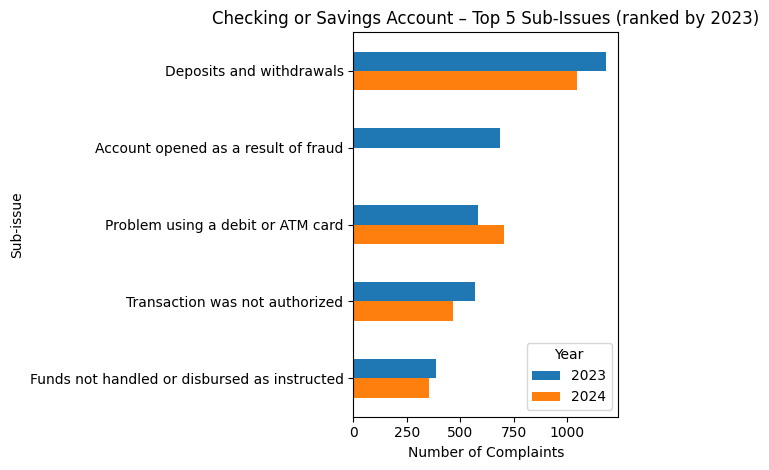

In [ ]:
checking = complaints[complaints["Product"] == "Checking or savings account"]
#Group by Year and Sub-issue
subissue_counts = checking.groupby(['Year', 'Sub-issue'])["Complaint ID"].count().reset_index()

subissue_wide = subissue_counts.pivot(index="Sub-issue", columns="Year", values="Complaint ID").fillna(0).astype(int)
subissue_wide = subissue_wide.reindex(columns=[2023, 2024], fill_value=0)
top = subissue_wide.sort_values(by=2023, ascending=False).head(5)

# Add % change column
top["% Change (23→24)"] = ((top[2024] - top[2023]) / top[2023] * 100).round(1).replace([float("inf"), -float("inf")], 0)

display(top)

# 4) Plot horizontal bar chart
ax = top[[2023, 2024]].plot.barh()
ax.invert_yaxis()  # largest at top
plt.title("Checking or Savings Account – Top 5 Sub-Issues (ranked by 2023)")
plt.xlabel("Number of Complaints")
plt.ylabel("Sub-issue")
plt.legend(title="Year")
plt.tight_layout()

> For Checking or Savings Accounts, the top sub-issues in 2023 were 'Deposits and withdrawals' (1,181), 'Account opened as a result of fraud' (686), 'Problem using a debit or ATM card' (582), 'Transaction was not authorized' (567), and 'Funds not handled or disbursed as instructed' (386). By 2024, overall complaints for this product declined, with 'Deposits and withdrawals' falling slightly (−11.4%). Most notably, 'account opened as a result of fraud' disappeared entirely in 2024, suggesting improvements in fraud detection and account opening processes. At the same time, debit/ATM card issues increased by 21%, making them the only major sub-issue to rise year-over-year. This indicates that while there was progress made in reducing fraud, operational issues around card usage remain a growing concern.

#### *'Credit Card' Product*

<br>'Credit card' product related complaints have risen sharply, increasing from 1080 in 2023 to 3353 in 2024, which represents growth of over 200% just in the last year alone. This sharp rise is a major concern and highlights the need for immediate investigation to improve customer satisfaction and reduce potential profit loss. To understand what is driving this sharp rise in complaints, we will examine the top sub-issues for Credit Cards and how they changed between 2023 and 2024


Year,2023,2024,% Change (23→24)
Sub-issue,,,
Credit card company isn't resolving a dispute about a purchase on your statement,218,712,226.6
Other problem,106,243,129.2
Card was charged for something you did not purchase with the card,88,281,219.3
Problem during payment process,86,299,247.7
Card opened without my consent or knowledge,81,252,211.1


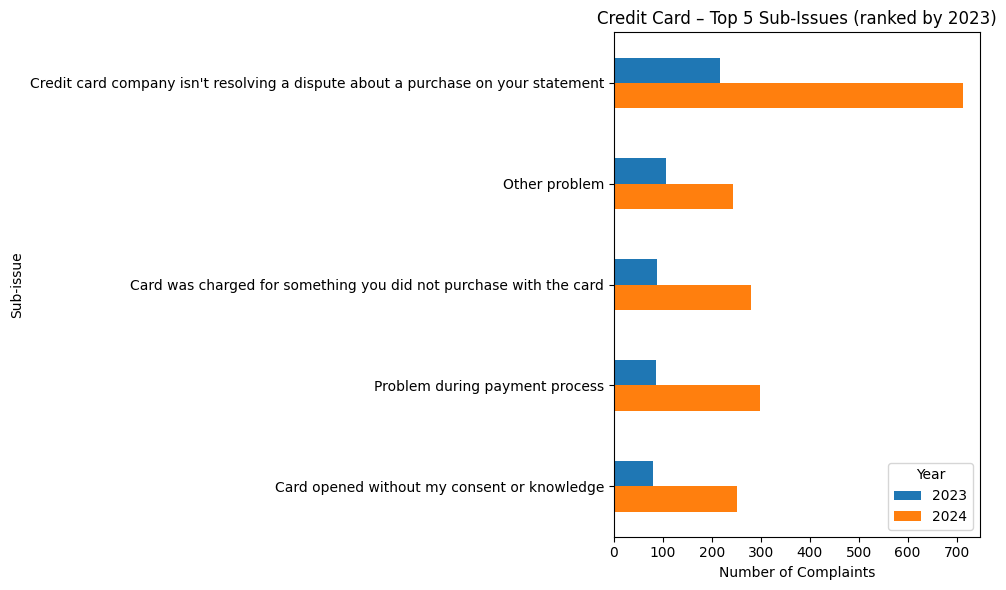

In [ ]:
checking = complaints[complaints["Product"] == "Credit card"]
#Group by Year and Sub-issue
subissue_counts = checking.groupby(['Year', 'Sub-issue'])["Complaint ID"].count().reset_index()

subissue_wide = subissue_counts.pivot(index="Sub-issue", columns="Year", values="Complaint ID").fillna(0).astype(int)
subissue_wide = subissue_wide.reindex(columns=[2023, 2024], fill_value=0)
top = subissue_wide.sort_values(by=2023, ascending=False).head(5)

# Add % change column
top["% Change (23→24)"] = ((top[2024] - top[2023]) / top[2023] * 100).round(1).replace([float("inf"), -float("inf")], 0)

display(top)

# 4) Plot horizontal bar chart
ax = top[[2023, 2024]].plot.barh(figsize=(10, 6))
ax.invert_yaxis()  # largest at top
plt.title("Credit Card – Top 5 Sub-Issues (ranked by 2023)")
plt.xlabel("Number of Complaints")
plt.ylabel("Sub-issue")
plt.legend(title="Year")
plt.tight_layout()

> As shown in the graph, all of the top five sub-issues for 'Credit Cards' increased by at least 100% between 2023 and 2024, with four of them rising by more than 200%. The largest spike was in complaints about payment process problems (+247.7%), followed by unresolved statement disputes (+226.6%). Other major increases came from unauthorized charges and fraudulent account openings, both above +200%. Even the smallest category, ‘Other problem,’ still rose by +129%. These sharp increases highlight significant weaknesses in how credit card issues are being managed, particularly around fraud and transaction disputes, signalling an urgent need for corrective action.

#### *'Credit reporting or other personal consumer reports' Product*

<br>Similar to 'Credit Cards', complaints about 'Credit Reporting or Other Personal Consumer Reports' have also risen sharply, showing a steep increase from 2023 to 2024. This highlights growing issues in how credit reports are being managed and resolved. To better understand this surge, we will look at the top sub-issues driving complaints within 'Credit Reporting' and how they have changed over time.

Year,2023,2024,% Change (23→24)
Sub-issue,,,
Their investigation did not fix an error on your report,158,333,110.8
Information belongs to someone else,153,477,211.8
Credit inquiries on your report that you don't recognize,145,420,189.7
Reporting company used your report improperly,141,990,602.1
Account status incorrect,74,314,324.3


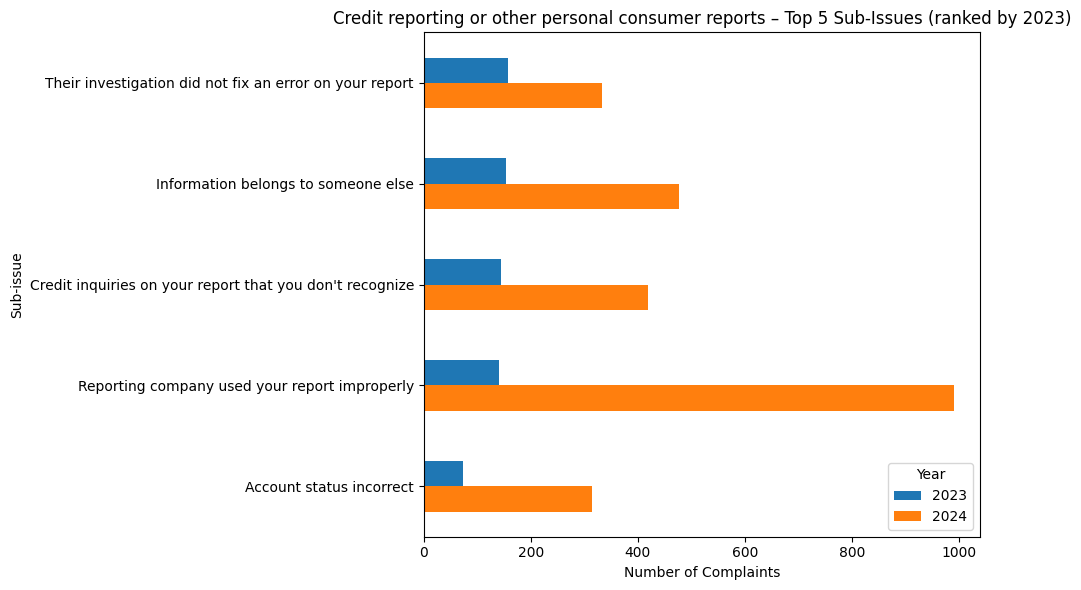

In [ ]:
credit_reporting = complaints[complaints["Product"] == "Credit reporting or other personal consumer reports"]

subissue_counts = credit_reporting.groupby(['Year', 'Sub-issue'])["Complaint ID"].count().reset_index()

subissue_wide = subissue_counts.pivot(index="Sub-issue", columns="Year", values="Complaint ID").fillna(0).astype(int)
subissue_wide = subissue_wide.reindex(columns=[2023, 2024], fill_value=0)
top = subissue_wide.sort_values(by=2023, ascending=False).head(5)

# Add % change column
top["% Change (23→24)"] = ((top[2024] - top[2023]) / top[2023] * 100).round(1).replace([float("inf"), -float("inf")], 0)

display(top)

# 4) Plot horizontal bar chart
ax = top[[2023, 2024]].plot.barh(figsize=(10, 6))
ax.invert_yaxis()  # largest at top
plt.title("Credit reporting or other personal consumer reports – Top 5 Sub-Issues (ranked by 2023)")
plt.xlabel("Number of Complaints")
plt.ylabel("Sub-issue")
plt.legend(title="Year", loc="lower right")
plt.tight_layout()

> The chart shows that every one of the top five sub-issues for 'Credit reporting or other personal consumer reports' rose considerably between 2023 and 2024. The most striking jump came from 'Reporting company used your report improperly' which increased more than sixfold. Issues tied to identity and accuracy, such as 'Account status incorrect', 'Information belongs to someone else' and 'Credit inquiries you don’t recognize' also grew steeply, each well above 150%. Even error investigations, while the least severe rise, still more than doubled. Together these patterns point to systemic weaknesses in consumer reporting processes, with misuse of reports and identity mix-ups emerging as the most pressing concerns.

<br> **Conclusion**

<br> From looking at the top three products, 'Checking or savings accounts' have managed to bring fraud complaints down, but they still need to fix day-to-day operational problems to cut overall complaints further. 'Credit cards' are now seeing a big rise in fraud and dispute issues, showing that stronger fraud controls and better handling of transaction errors are needed. 'Credit reporting' has the most worrying jump, with identity misuse and data errors driving a steep increase in complaints. These trends show the business needs to focus on fraud, identity protection, and smoother processes to keep customers’ trust and avoid bigger problems later.


## Geographic distribution


In this section, the analysis will examine which areas of the United States generate the highest number of complaints. Although the dataset includes ZIP codes, a significant portion are masked (such as “XXXXX” or “604XX”) or missing, which limits their reliability. For this reason, the analysis will be conducted at the state level to ensure consistency and accuracy. The focus will be on the top three states with the highest complaint volumes, with a breakdown of the most common sub-issues driving complaints in each state. This will highlight the regions that require the greatest attention and provide insight into the specific issues most affecting consumers.

### Complaint Distribution by State


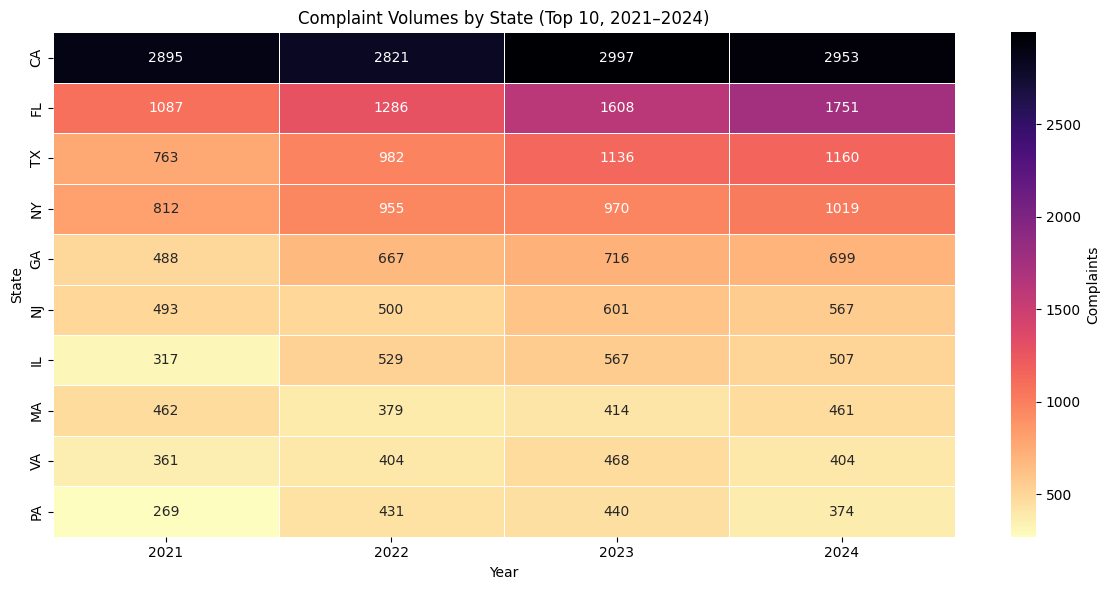

In [ ]:
# Count complaints by Year and State
state_counts = complaints.groupby(['Year', 'State'], as_index=False)['Complaint ID'].count()

# Pivot into wide format
state_wide = state_counts.pivot(index='State', columns='Year', values='Complaint ID').fillna(0).astype(int)

# Select top 10 states by total complaints
top10_states = state_wide.sum(axis=1).sort_values(ascending=False).head(10).index
state_wide_top10 = state_wide.loc[top10_states]

# Heatmap for top 10 states
plt.figure(figsize=(12, 6))
sns.heatmap( state_wide_top10, cmap='magma_r', linewidths=.5, annot=True, fmt='.0f', cbar_kws={'label': 'Complaints'}
)
plt.title("Complaint Volumes by State (Top 10, 2021–2024)")
plt.xlabel("Year")
plt.ylabel("State")
plt.tight_layout()
plt.show()


> The heatmap shows the top 10 states with the highest complaint volumes from 2021 to 2024. California recorded the largest number of complaints each year, remaining close to 3,000 across the period, followed by Florida, Texas, and New York. However, when population size is considered, smaller states such as Georgia and New Jersey report relatively higher complaint rates compared to their overall population. In contrast, states with larger populations such as California and Texas have high volumes but a lower rate per capita. This indicates that complaint intensity is not solely driven by population. To better understand these dynamics, the following section examines California, Florida, and Georgia in greater detail.

#### *California State*

<br> This section examines California, which consistently reported the highest number of complaints from 2021 to 2024. The stability of volumes near 3,000 each year suggests that the issues are structural and persistent rather than short-term variations.

Sub-issue,Deposits and withdrawals,Problem using a debit or ATM card,Credit card company isn't resolving a dispute about a purchase on your statement,Reporting company used your report improperly,Card company isn't resolving a dispute about a purchase or transfer
Year,,,,,
2021,280.0,219.0,104.0,6.0,115.0
2022,279.0,213.0,93.0,31.0,112.0
2023,286.0,161.0,109.0,40.0,147.0
2024,257.0,167.0,147.0,132.0,129.0


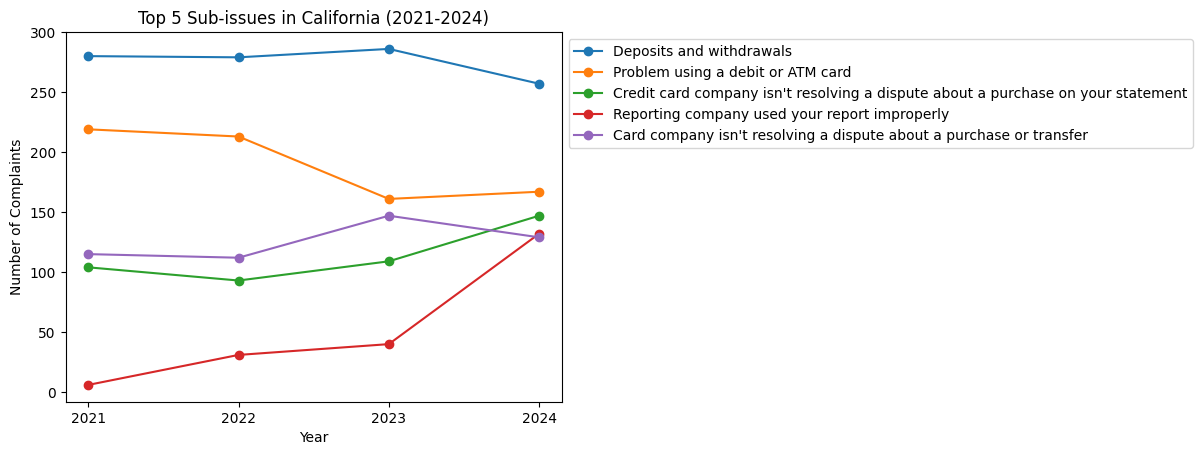

In [ ]:
cali = complaints[complaints['State'] == 'CA']

cali_sort = cali.groupby(['Year', 'Sub-issue'])['Complaint ID'].count().reset_index()

cali_pivot = cali_sort.pivot(index="Sub-issue", columns="Year", values="Complaint ID").fillna(0)

top = cali_pivot.sort_values(by=2024, ascending=False).head(5)

top_t = top.transpose()

display(top_t)

ax = top_t.plot.line(marker = 'o')
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.title("Top 5 Sub-issues in California (2021-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

> 'Deposits and withdrawals' remained the most common complaint in California throughout the period. It peaked in 2023 at nearly 290 complaints before declining to 257 in 2024, suggesting some progress in addressing this long-standing issue. 'Problem using a debit or ATM card' showed a different trend, with a sharp fall in 2023 followed by a slight increase in 2024, indicating that the issue has been partly managed but still requires further attention.

> At the same time, newer risks are emerging. 'Reporting company used your report improperly' rose sharply from 40 complaints in 2023 to 132 in 2024, marking the sharpest increase of all sub-issues. Credit card company disputes also grew steadily across the four years, particularly around purchases on statements and transfers. Overall, while traditional concerns are showing signs of easing, credit and reporting-related complaints are emerging as the key challenges in California.

#### *Florida State*

<br> This section examines California, which consistently reported the highest number of complaints from 2021 to 2024. The stability of volumes near 3,000 each year suggests that the issues are structural and persistent rather than short-term variations.

Sub-issue,Reporting company used your report improperly,Deposits and withdrawals,Information belongs to someone else,Problem using a debit or ATM card,Account status incorrect
Year,,,,,
2021,3.0,102.0,78.0,53.0,27.0
2022,18.0,96.0,162.0,62.0,21.0
2023,53.0,132.0,72.0,65.0,30.0
2024,254.0,95.0,88.0,76.0,73.0


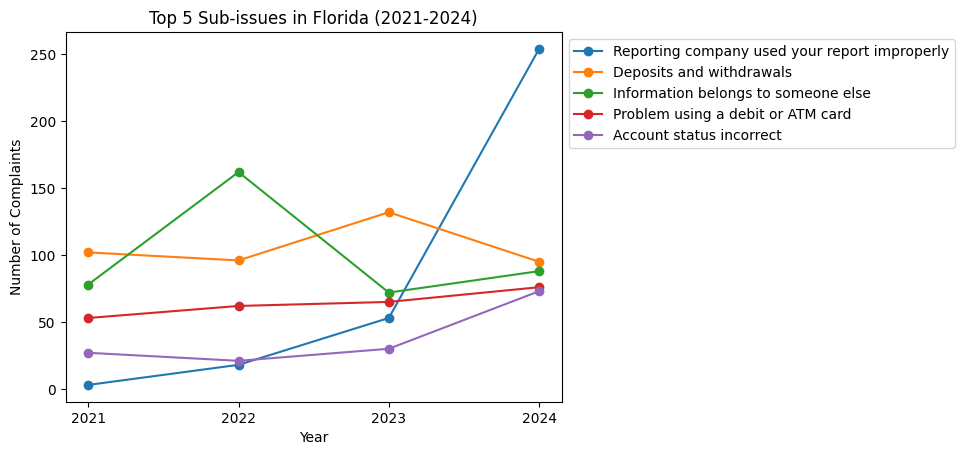

In [ ]:
fl = complaints[complaints['State'] == 'FL']

fl_sort = fl.groupby(['Year', 'Sub-issue'])['Complaint ID'].count().reset_index()

fl_pivot = fl_sort.pivot(index="Sub-issue", columns="Year", values="Complaint ID").fillna(0)

top = fl_pivot.sort_values(by=2024, ascending=False).head(5)

top_t = top.transpose()

display(top_t)

ax = top_t.plot.line(marker = 'o')
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.title("Top 5 Sub-issues in Florida (2021-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

> In Florida, 'deposits and withdrawals' remained one of the main concerns, peaking at 132 complaints in 2023 before falling to 95 in 2024, while 'information belongs to someone else' declined from its 2022 high of 162 to 88 in 2024. Complaints about debit or ATM card problems and account status incorrect showed steady growth over the four years, reaching 76 and 73 respectively in 2024. The most significant development was reporting company used your report improperly, which rose dramatically from 53 in 2023 to 254 in 2024, making it the fastest-rising issue and a growing area of risk for the state.

#### *Georgia State*

<br> This section examines California, which consistently reported the highest number of complaints from 2021 to 2024. The stability of volumes near 3,000 each year suggests that the issues are structural and persistent rather than short-term variations.

Sub-issue,Reporting company used your report improperly,Deposits and withdrawals,Information belongs to someone else,Company closed your account,Transaction was not authorized
Year,,,,,
2021,4.0,26.0,33.0,30.0,22.0
2022,23.0,56.0,33.0,31.0,23.0
2023,36.0,70.0,49.0,33.0,22.0
2024,74.0,62.0,52.0,32.0,26.0


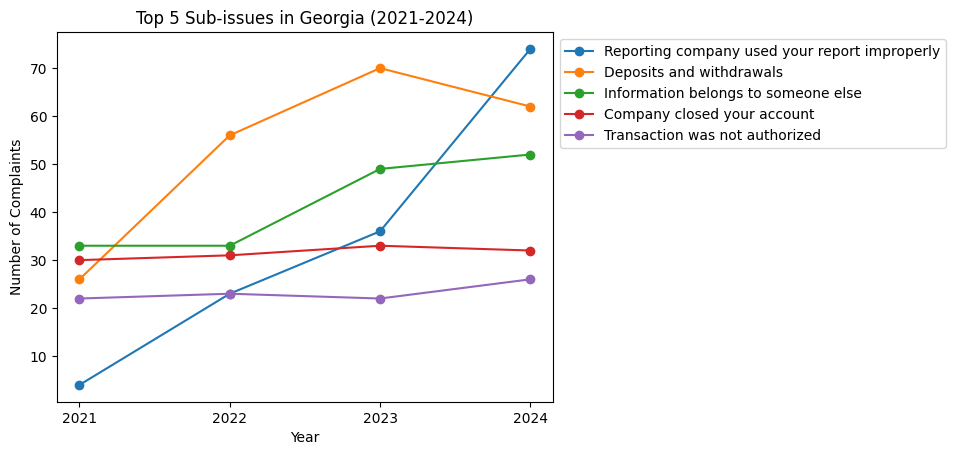

In [ ]:
ga = complaints[complaints['State'] == 'GA']

ga_sort = ga.groupby(['Year', 'Sub-issue'])['Complaint ID'].count().reset_index()

ga_pivot = ga_sort.pivot(index="Sub-issue", columns="Year", values="Complaint ID").fillna(0)

top = ga_pivot.sort_values(by=2024, ascending=False).head(5)

top_t = top.transpose()

display(top_t)

ax = top_t.plot.line(marker = 'o')
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.title("Top 5 Sub-issues in Georgia (2021-2024)")
plt.xlabel("Year")
plt.ylabel("Number of Complaints")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

> In Georgia, 'deposits and withdrawals' was the most frequent complaint, climbing from 26 in 2021 to a peak of 70 in 2023 before easing slightly to 62 in 2024. 'Information belongs to someone else' showed steady growth, rising from 33 in 2021 to 52 in 2024, while 'company closed your account' remained relatively stable, ending at 32 in 2024. 'Transaction was not authorized' showed only minor fluctuations, with complaints ranging between 22 and 26 across the four years. The most significant change came from 'reporting company used your report improperly', which jumped from 36 in 2023 to 74 in 2024, highlighting a rapidly emerging risk that may require closer monitoring in Georgia.

<br> **Conclusion**

<br> The analysis of California, Florida and Georgia highlights a clear pattern across all three states. The sub-issue 'reporting company used your report improperly' rose sharply in 2024 compared to 2023, making it an emerging concern that requires immediate attention. If left unaddressed, this trend could escalate into serious privacy risks and potential legal consequences for the company. In contrast, 'deposits and withdrawals' complaints showed signs of being brought under control, with all three states recording declines in 2024 after previous peaks. This suggests that targeted interventions are beginning to take effect, but the rapid growth of reporting-related complaints indicates a shift in consumer risk that demands stronger monitoring, regulatory oversight and proactive corrective measures.


# IV. SUMMARY
The analysis shows that while complaints about 'deposits and withdrawals' have started to decline, new challenges are emerging, with 'reporting company used your report improperly' rising sharply across states and credit reporting becoming the fastest-growing product issue. 'Checking or savings accounts' have reduced fraud cases but still face operational problems, and 'credit cards' are experiencing more fraud and dispute complaints. Complaint volumes remain steady overall, but recurring peaks in March and July point to seasonal patterns that require better resourcing. Together, these findings suggest that Bank of America has made progress in some areas but must focus more on fraud prevention, reporting accuracy and operational improvements to maintain customer trust and reduce future risks.